# LangChain - input/output core components
* Notebook by Adam Lang
* Date: 6/10/2024
* We will go over the core components of LangChain related to the typical chain components


# Typical Chain in LangChain

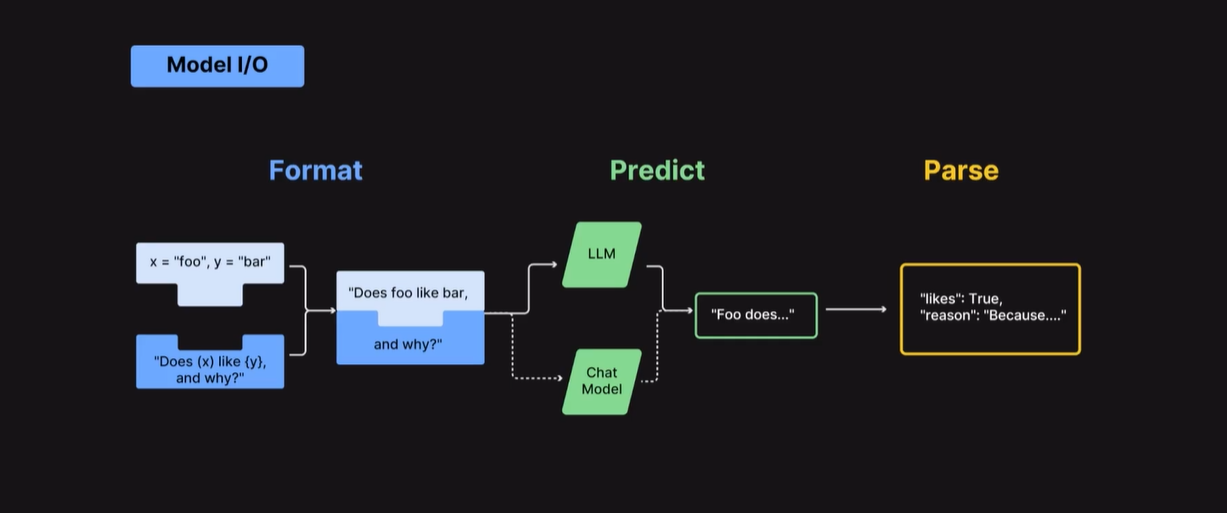

1. Format inputs
  * input variables
  * create prompt using inputs
2. Predict
  * Sent to LLM --> predict response
3. Parse
  * output parser --> structured responses (e.g. JSON, CSV, etc.)


# LLMs and Chat Models
* LangChains LLM components have 2 different types of models
1. General prompting LLMs
2. Conversational prompting LLMs
  * Groups of messages sent to the LLM rather than 1 prompt at a time.

* The idea is to interface with these LLMs using Prompt Templates with LangChain

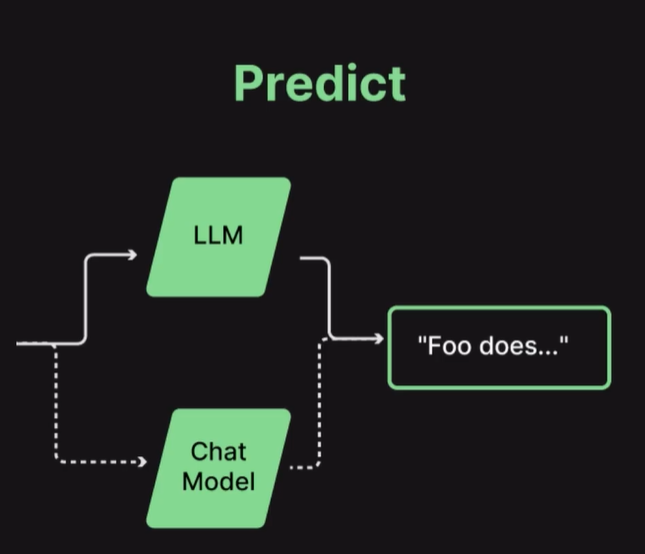

## What are "Prompt Templates"
* Users can create Prompt Templates which serve as "sets of instructions and input variabes".
* These input variables are then populated at runtime in the Prompt Template and sent to the LLM
* In a sense, the Prompt Template acts as a container for processing the prompts in a pipeling to the LLM.
* The overall concept is this (usually):
1. Input variables are created
  * x = "foo", y = "bar"
2. Prompt Template is created
  * "Does (x) like {y}, and why?"

3. The 2 are merged together and sent to the LLM.

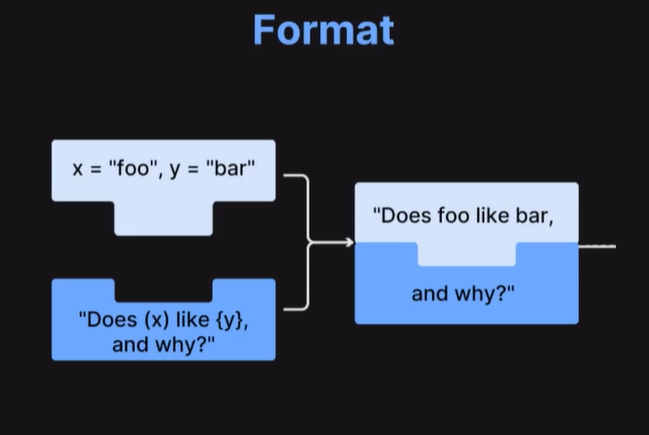

Note: The template is formatted at run-time

## What about Output Parsers?
* The last step which can be optional, is to convert the raw LLM responses to more consumable formats for the user via LangChain "Output Parsers".
* This could be compared to a neural network giving you the raw "logits" and using an activation function to then convert them to the prediction probabilities so the information is consumable.
* There are multiple types of output parsers, these are just a few:
1. JSON parser
2. Pydantic parser
3. CSV parser
4. String parser

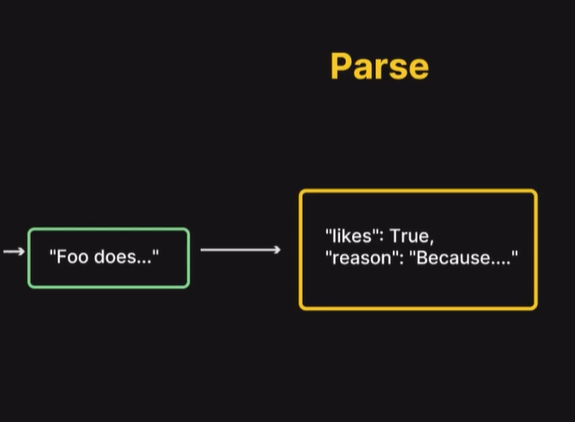

## Other important advanced LLM operations with LangChain
* Token cost monitoring
* Streaming responses
* Caching requests

# LLMs and ChatModels for input/output with LangChain

## Install libraries

In [1]:
!pip install langchain==0.1.19
!pip install langchain-openai==0.1.6
!pip install langchain-community==0.0.38
!pip install huggingface_hub==0.20.3

#### We are going to download some open source LLMs from huggingface so we need transformers library

In [2]:
## open source LLM access from huggingface
!pip install transformers==4.38.2

## API tokens
* OpenAI
* HuggingFace

In [3]:
from getpass import getpass

OPENAI_KEY = getpass('Please enter your OpenAI API key: ')

Please enter your OpenAI API key: ··········


## HuggingFace API token

In [4]:
from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass('Enter your HuggingFace token here: ')

Enter your HuggingFace token here: ··········


## Systen Environment Variables
* To access API keys

In [20]:
import os

os.environ['HUGGINGFACEHUB_API_TOKEN'] = HUGGINGFACEHUB_API_TOKEN
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Model Input/Output (I/O)
* The central part of any application in LangChain is the language model.
* This will provide vital tools to work effectively and efficiently with any language model to be sure it integrates and communicates with the chain system.

### Key Components of Model I/O
* LLMs and Chat Models (used interchangeably)
  * LLMs:
    * Definition: **Pure text completion models.**
    * Input/Output: Receives a text string and returns a text string.
  
  * Chat Models:
    * Definition: Based on a language model but with **different input and output types.**
    * Input/Output: Takes in a list of chat messages as input and produces a chat message output.

# Accessing Commerical LLMs -- ChatGPT

## Accessing ChatGPT as an LLM
* Below you will see how to access a basic ChatGPT Instruct LLM.
* The ChatModel interface which we will see later is actually better because the LLM API does not support chat models like `gpt-3.5-turbo` and only supports the `instruct` models which can respond to instructions but can't have a full conversation with the user.

In [21]:
from langchain_openai import OpenAI

chatgpt = OpenAI(model_name='gpt-3.5-turbo-instruct', temperature=0)


In [22]:
## setup a prompt
prompt = """In 3 bullet points, explain what
          an ICD-10 code is."""

# print prompt
print(prompt)

In 3 bullet points, explain what
          an ICD-10 code is.


In [23]:
## get the LLM response
response = chatgpt.invoke(prompt)

# print response
print(response)



- An ICD-10 code is a unique alphanumeric code used to classify diseases, injuries, and health conditions.
- It is part of the International Classification of Diseases (ICD) system, which is used by healthcare providers to record and report medical diagnoses.
- The ICD-10 code provides a standardized way to communicate and track health conditions, allowing for more accurate and efficient healthcare data collection and analysis.


## Accessing ChatGPT as a Chat Model LLM
* Now we will get into the more advanced ways to interact with ChatGPT Turbo Chat based LLM.
* The ChatModel interface is "better" persay because it supports chat models like `gpt-3.5-turbo` which responds to:
1. instructions
2. can have a conversation with you!

In [24]:
## imports
from langchain_openai import ChatOpenAI

## gpt-3.5-turbo --> conversational LLM
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)


In [25]:
## setup a prompt template
prompt = """Explain to me what atrial fibrillation is in 3 bullet points."""
print(prompt)

Explain to me what atrial fibrillation is in 3 bullet points.


In [26]:
## get the response
response = chatgpt.invoke(prompt)
response

AIMessage(content="- Atrial fibrillation is a type of irregular heartbeat that occurs when the heart's upper chambers (atria) beat chaotically and out of sync with the lower chambers (ventricles).\n- It can lead to symptoms such as palpitations, shortness of breath, fatigue, and dizziness.\n- Atrial fibrillation increases the risk of stroke, heart failure, and other heart-related complications if left untreated.", response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 23, 'total_tokens': 108}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3eb04472-6dde-47d5-888c-ee6a77a985db-0')

Summary of above:
* Notice we received an "AIMessage" and not the completed structured output in 3 bullet points. This is why the conversational API is different.
* Thus to access this we use the `.content` function.

In [27]:
print(response.content)

- Atrial fibrillation is a type of irregular heartbeat that occurs when the heart's upper chambers (atria) beat chaotically and out of sync with the lower chambers (ventricles).
- It can lead to symptoms such as palpitations, shortness of breath, fatigue, and dizziness.
- Atrial fibrillation increases the risk of stroke, heart failure, and other heart-related complications if left untreated.


## Accessing Open Source LLMs with HuggingFace and LangChain

### Accessing Open LLMs with HuggingFace Serverless API
* There is a free serverless API via HF that will let you implement solutions and iterate, but it is rate limited for larger workloads so beware.
  * HF serverless API: https://huggingface.co/inference-api/serverless

* Enterprise workloads: use inference endpoints -- nosted on specific cloud instance of your choice and would have a cost associated with it. In this example we will use the free serverless API which works well in majority of cases.

* Overall, the plus side of this is that you DO NOT need to download the models or run them locally on your own GPU infrastructure which will cost you time, money and compute power.

### Microsoft Phi-3 Mini Instruct
* Phi-3-Mini-4k-Instruct is 3.8B parameters, lightweight, state of the art open source model trained with Phi-3 datasets that includes synthetic data and publicly available filtered data via websites with a focus on high-quality and reasoning dense properties.
* Full details: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct

In [28]:
from langchain_community.llms import HuggingFaceEndpoint

# API call
PHI3_MINI_API_URL = "https://api-inference.huggingface.co/models/microsoft/Phi-3-mini-4k-instruct"
# setup params
phi3_params = {
                "wait_for_model": True, # waits if model is not available in HF server - won't timeout
                "do_sample": False, # greedy decoding - temperature = 0
                "return_full_text": False, # don't return input prompt
                "max_new_tokens": 1000, # max tokens to answer with
}

## instantiate llm
llm = HuggingFaceEndpoint(
    endpoint_url=PHI3_MINI_API_URL,
    task='text-generation',
    **phi3_params
)

                    wait_for_model was transferred to model_kwargs.
                    Please make sure that wait_for_model is what you intended.


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [29]:
## lets use same prompt from above
prompt

'Explain to me what atrial fibrillation is in 3 bullet points.'

### Phi-3 prompt format
* `<|user|>\nQuestion <|end|>\n<|assistant|>`
* source: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct


In [30]:
## setup prompt using Phi-3 LLM structure
phi3_prompt = """<|user|>Explain what atrial fibrillation is in 3 bullet points.<|end|>\n<|assistant|>"""

#print phi3_prompt
print(phi3_prompt)

<|user|>Explain what atrial fibrillation is in 3 bullet points.<|end|>
<|assistant|>


In [31]:
## get response from phi3
response = llm.invoke(phi3_prompt)
print(response)

- Atrial fibrillation (AFib) is a common heart rhythm disorder characterized by rapid and irregular beating of the atria, the upper chambers of the heart.
- It occurs when the electrical signals in the heart's upper chambers become chaotic and disorganized, causing the atria to quiver or fibrillate instead of contracting in a coordinated manner.
- AFib can increase the risk of stroke, heart failure, and other heart-related complications, making it crucial to diagnose and manage the condition promptly.


## Accessing Open source Google Gemma 2B Instruct

Gemma is a family of lightweight, state-of-the-art open models from Google, built from the same research and technology used to create the Gemini models. They are text-to-text, decoder-only large language models, available in English, with open weights, pre-trained variants, and instruction-tuned variants. Gemma models are well-suited for a variety of text generation tasks, including question answering, summarization, and reasoning. Their relatively small size makes it possible to deploy them in environments with limited resources such as a laptop, desktop or your own cloud infrastructure, democratizing access to state of the art AI models and helping foster innovation for everyone.
* Model card: https://huggingface.co/google/gemma-2b-it

In [32]:
GEMMA_API_URL = "https://api-inference.huggingface.co/models/google/gemma-2b-it"

# gemma params
gemma_params = {
                "wait_for_model": True, #waits if model is not available on HF server yet
                "do_sample": False, # greedy decoding - temperture=0
                "return_full_text": False, #dont return input prompt
                "max_new_tokens": 1000, #max tokens answer can go upto
              }

# instantiate llm from HF endpoint
llm = HuggingFaceEndpoint(
    endpoint_url=GEMMA_API_URL,
    task="text-generation",
    **gemma_params
)



                    wait_for_model was transferred to model_kwargs.
                    Please make sure that wait_for_model is what you intended.


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [33]:
## use same prompt
prompt

'Explain to me what atrial fibrillation is in 3 bullet points.'

In [34]:
# get response
response = llm.invoke(prompt)
print(response)



* Atrial fibrillation is an irregular heartbeat where the upper chambers of the heart beat too fast, irregularly, or not at all.
* It can be caused by a variety of factors, including heart disease, high blood pressure, atrial fibrillation, and sleep apnea.
* Symptoms include palpitations, shortness of breath, dizziness, and fainting.


# Accessing Local LLMs with HuggingFacePipeline API
* You can also easily run HF models locally via the `HuggingFacePipeline` class. You will need GPU access though.
* The huggingface model hub has over 500k models and 90K+ open source LLMs.
* Models can be called from LangChain either by:
  * 1. local pipeline wrapper
  * 2. calling local hosted inference endpoints through `HuggingFaceEndpoint` API
* To use this you need `transformers` python package installed, as well as `pytorch`.
* Advantages?
  * 1. Model is local.
  * 2. Privacy and Security
* Disadvantages?
  * 1. Need good compute infrastructure with a GPU to work well.

## Accessing Google Gemma 2B running it locally

In [ ]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline

# setup params for tiny llama
gemma_params = {
                "do_sample": False, #greedy decoding - temp = 0
                "return_full_text": False, # don't return input prompt
                "max_new_tokens": 1000 #max tokens answer can go up to
}

# instantiate local llm
local_llm = HuggingFacePipeline.from_model_id(
    model_id="google/gemma-1.1-2b-it",
    task="text-generation",
    pipeline_kwargs=gemma_params,
    device=0 # when run on colab selects GPU -- can change if want to run on local instance
)

In [ ]:
local_llm

In [ ]:
prompt

In [ ]:
response = local_llm.invoke(gemma_prompt)
print(response)